In [43]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from PIL import Image
from skimage import transform

# load the MNIST data
from keras.datasets import mnist


In [30]:
def load(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (256, 256, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

In [116]:
def play_nmist_img(img_path):
  img = image.load_img(img_path, target_size=(28,28), color_mode='grayscale')
  plt.imshow(img)
  plt.show()

  img = image.img_to_array(img)
  img = img / 255
  img = img.reshape(-1, 1)
  img = np.expand_dims(img, axis=0)

  return img

In [118]:
def predict_number(img, model):
  result = model.predict(img)
  print(f"prediction: {np.argmax(result)}")

In [ ]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# reshape the data
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [ ]:
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [86]:
# create model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [88]:
# train
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0575 - accuracy: 0.9815 - val_loss: 0.0881 - val_accuracy: 0.9758
Epoch 2/3
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0441 - accuracy: 0.9862 - val_loss: 0.0795 - val_accuracy: 0.9783
Epoch 3/3
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0354 - accuracy: 0.9892 - val_loss: 0.0734 - val_accuracy: 0.9798


In [89]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 512)               401920    
                                                                 
 dense_12 (Dense)            (None, 512)               262656    
                                                                 
 dense_13 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [90]:
# evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0] * 100)
print('Test accuracy:', score[1] * 100)

Test loss: 7.341998815536499
Test accuracy: 97.97999858856201


In [ ]:
# save the model
model.save("model_mnist_nn.h5")

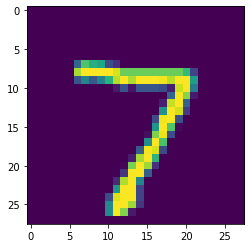

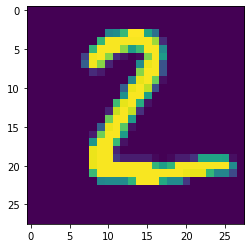

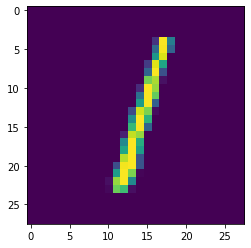

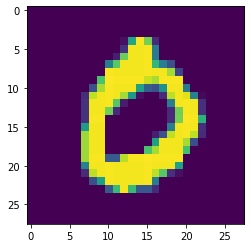

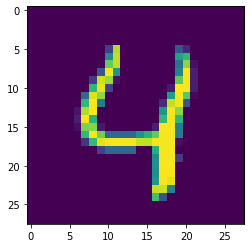

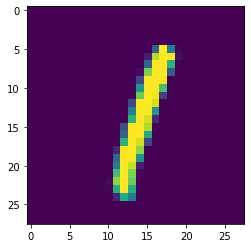

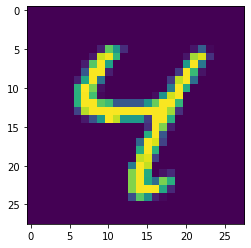

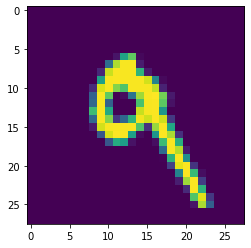

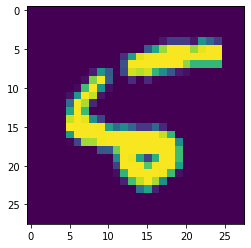

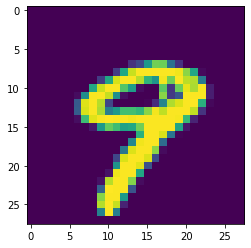

prediction: 355
actual: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
prediction: 97
actual: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
prediction: 406
actual: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
prediction: 262
actual: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
prediction: 299
actual: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
prediction: 157
actual: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
prediction: 287
actual: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
prediction: 324
actual: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
prediction: 425
actual: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
prediction: 357
actual: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [91]:
# show the test images
for i in range(0, 10):
    plt.imshow(x_test[i].reshape(28, 28))
    plt.show()

# predict the test images
for i in range(0, 10):
    print("prediction: {}".format(np.argmax(x_test[i])))
    print("actual: {}".format(y_test[i]))

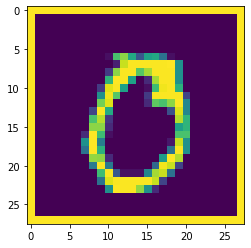

In [113]:
# predict an image
img = image.load_img('./sample_data/images.png', target_size=(28,28), color_mode='grayscale')
plt.imshow(img)
plt.show()

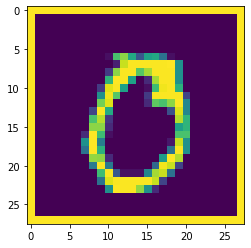

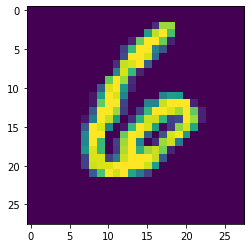

In [117]:
img0 = play_nmist_img("./sample_data/images.png")
img1 = play_nmist_img("./sample_data/mnist1.png")

In [119]:
predict_number(img0, model)

prediction: 0


In [120]:
predict_number(img1, model)

prediction: 6
